In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression (PyTorch)

In [ ]:
n_data = torch.ones(1000, 2) # 데이터를 1000개씩 두줄 형태로

# 데이터를 분류하기 위해 데이터를 생성한 것
X0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(1000)
X1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(1000)

# 데이터를 묶어주는 작업
train_X = np.vstack([X0, X1])
train_y = np.vstack([y0, y1]).reshape(-1, 1)

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

# Define train_X, train_y for torch
train_X, train_y = torch.from_numpy(train_X).float(), torch.from_numpy(train_y).float() 

print(train_X.shape, train_y.shape)

torch.Size([2000, 2]) torch.Size([2000, 1])


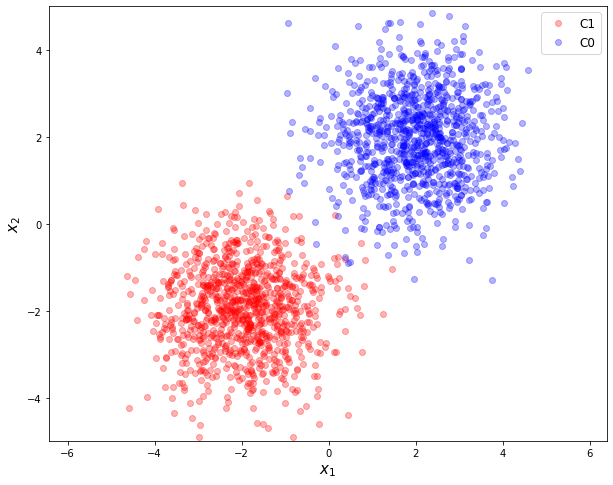

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(train_X[C1,0], train_X[C1,1], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,0], train_X[C0,1], 'bo', alpha = 0.3, label='C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([-5,5])
plt.show()

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

def load_array(data_arrays, batch_size, is_train = True):
    # Define dataset and dataloader
    dataset = TensorDataset(*data_arrays) # data_arrays형태로 데이터셋 구성
    dataloader = DataLoader(dataset = dataset, 
                            batch_size = batch_size,
                            shuffle = is_train)
    return dataloader

In [ ]:
data_iter = load_array((train_X, train_y), batch_size=len(train_y))

In [ ]:
class LogisticRegressionModel(torch.nn.Module):
    # Define init, forward method
    def __init__(self): # 성질을 정의
        super(LogisticRegressionModel, self).__init__() # 메소드를 상속받음
        self.layer = torch.nn.Linear(2, 1) # input layer는 2개 중 1개를 구분하는 문제로 linear하게 구성
        self.sigmoid = torch.nn.Sigmoid() # 최종적으로 simoid로 판별하는 문제로

    def forward(self, inputs): # layer와 layer 사이의 관계를 정의
        outputs = self.layer(inputs) # layer에 input을 넣었을 때 나오는 값을 output으로
        return self.sigmoid(outputs)

model_logR = LogisticRegressionModel()

if torch.cuda.is_available(): # GPU 활용할건지
    train_X, train_y = train_X.cuda(), train_y.cuda()
    model_logR.cuda()

In [ ]:
# layer들의 weight와 bias를 초기화하게 됨
print(model_logR.layer.weight.data)
print(model_logR.layer.bias.data)

tensor([[0.5850, 0.6109]], device='cuda:0')
tensor([-0.5960], device='cuda:0')


In [ ]:
# Define SGD optimizer 
optimizer_logR = torch.optim.SGD(model_logR.parameters(), lr = 0.05)

In [ ]:
model_logR.parameters

<bound method Module.parameters of LogisticRegressionModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [ ]:
num_epochs = 200
loss_graph_logR = []

for epoch in range(num_epochs):
    for X, y in data_iter:
        # training with predict, loss, zero_grad, backward, step
        predict_logR = model_logR(train_X) # input 데이터를 넣어주게 됨
        loss_logR = torch.nn.functional.binary_cross_entropy(predict_logR, train_y) # loss function
        optimizer_logR.zero_grad() # 앞서 정의한 최적화를 0으로 초기화
        loss_logR.backward() # loss에 대해서 역전파
        optimizer_logR.step() # 최적화에 대해서 업데이트
    loss_graph_logR.append(torch.nn.functional.binary_cross_entropy(model_logR(train_X), train_y))

# plt.plot(loss_graph_logR)
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.show()

-1.5429518222808838 -1.525949478149414 -0.23708783090114594


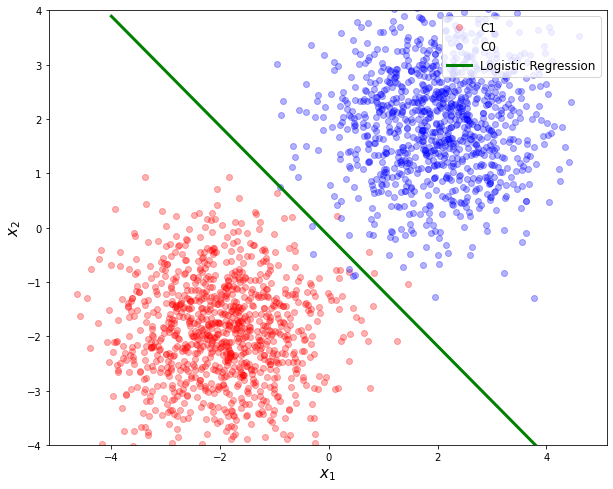

In [ ]:
w1 = model_logR.layer.weight[0][0].item()
w2 = model_logR.layer.weight[0][1].item()
b = model_logR.layer.bias.item()

print(w1, w2, b)

xp = np.arange(-4, 4, 0.01).reshape(-1, 1)
yp = - w1 / w2 * xp - b / w2

train_X, train_y = train_X.cpu(), train_y.cpu()

plt.figure(figsize = (10,8))
plt.plot(train_X[C1,0], train_X[C1,1], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,0], train_X[C0,1], 'bo', alpha = 0.3, label='C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([-4,4])
plt.show()

## MNIST_MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

# Define train_loader, Test_loader
train_loader = DataLoader(dataset=train_dataset,
                          batch_size = BATCH_SIZE,
                          shuffle = True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size = BATCH_SIZE,
                         shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


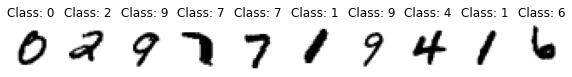

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
# 일반화 작업 없는 version

class NeuralNet(torch.nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.fclayer1 = torch.nn.Linear(28*28, 512)
    self.fclayer2 = torch.nn.Linear(512, 256)
    self.fclayer3 = torch.nn.Linear(256, 10)
    
  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fclayer1(x)
    x = F.sigmoid(x)
    x = self.fclayer2(x)
    x = F.sigmoid(x)
    x = self.fclayer3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [ ]:
class NeuralNet(torch.nn.Module):
    # Define init and forward method
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fclayer1 = torch.nn.Linear(28 * 28, 512) # 첫번째 layer: 28*28개의 input으로 512개의 output을 만들어냄
        self.fclayer2 = torch.nn.Linear(512, 256) # 두번째 layer: 512개의 input을 받아서 256개의 output을 만들어냄
        self.fclayer3 = torch.nn.Linear(256, 10) # 세번째 later: 256개의 input을 받아서 10개의 output(최종적)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten 작업(1차원으로 변형)
        x = self.fclayer1(x) # 첫번째 layer에 연결
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fclayer2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fclayer3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [ ]:
DEVICE

device(type='cuda')

In [ ]:
model = NeuralNet().to(DEVICE)

# Define optimizer, loss
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

criterion = nn.CrossEntropyLoss()

print(model)

NeuralNet(
  (fclayer1): Linear(in_features=784, out_features=512, bias=True)
  (fclayer2): Linear(in_features=512, out_features=256, bias=True)
  (fclayer3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        # training with output, loss, zero_grad, backward, step
        output = model(image)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
   
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item())) 

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad(): # gradient를 활용하지 못하도록
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            # Evaluate with output, test_loss, prediction, correct
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1] # 가장 높은 확률로 예측을 하게 됨
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.401308
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.495913
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.388857
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.158792
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.298068
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.294034
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.304758
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.545524
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.332408
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.249227

[EPOCH: 1], 	Test Loss: 0.0042, 	Test Accuracy: 95.62 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.067001
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.279058
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.316218
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.225013
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.127600
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.226047
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.455517
T